In [1]:
# Useful starting lines
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from implementations import*

In [3]:


DATA_TRAIN_PATH = '../data/train.csv/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# Pre-processing


In [4]:
selector = np.all(tX != -999.0, axis=1)
tX_clean = tX[selector]
y_clean = y[selector]

print(tX.shape)
print(tX_clean.shape)
    

(250000, 30)
(68114, 30)


In [5]:
def standardize_NAN(tX):
    tX_nan = tX.copy()
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if (tX_nan[i,j] == -999.0):
                tX_nan[i,j] = np.nan
    return (standardize(tX_nan))

def without_NAN(tX):
    tX_nan = tX.copy()
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if (tX_nan[i,j] == -999.0):
                tX_nan[i,j] = np.nan
    return tX_nan


# Tout les nans (correspondant a des valeurs non connues) sont remplacés par la moyenne de la colonnes
def replace_mean(tX_nan):
    means_cols = np.nanmean(tX_nan,axis=1)
    for row in range(0,tX_nan.shape[0]):
        for col in range(0,tX_nan.shape[1]):
            if np.isnan(tX_nan[row,col]):
                tX_nan[row,col]=means_cols[col]
    return (tX_nan)

tX_ns = without_NAN(tX)
tX_nan, mean_x_nan, std_x_nan = standardize_NAN(tX)
tX_nan = replace_mean(tX_nan)

92.56765498468643


C:\Users\emmal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\emmal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


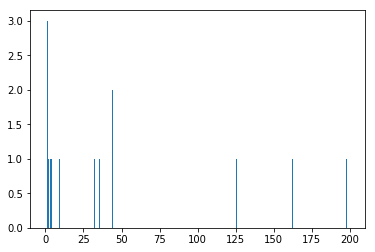

In [6]:
#COL DER_mass_MMC
plt.hist(tX_ns[2], range = (0,200), bins =400)
plt.show()

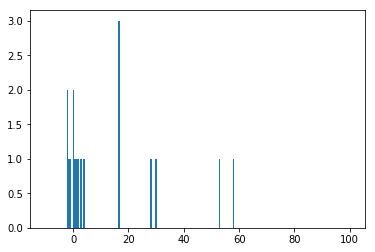

In [7]:
#plt.plot(tX[4])
plt.hist(tX_ns[4], range = (-10,100), bins =200)
plt.show()

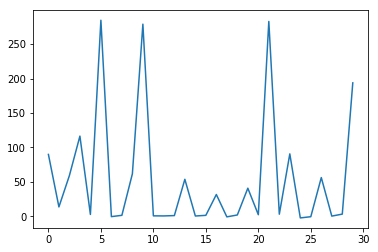

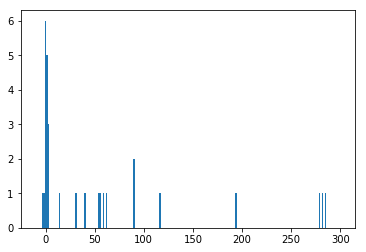

In [8]:
plt.plot(tX[5])
plt.show()
plt.hist(tX[5], range = (-10,300), bins =200)
plt.show()

In [9]:

colormap = np.array(['r', 'g', 'b'])
y_colors = y.copy()
y_colors[y_colors<0] = 0
categories = np.array(y_colors)
categories = categories.astype(int)
plt.plot(np.linspace(0,500, num=85667), tX_ns[cat1,12].T)
plt.show()
#plt.plot(tX_ns[12],color= colormap[categories])
#plt.show()
plt.hist(tX_ns[12], range = (-10,300), bins =300, color=colormap[categories])
plt.show()

NameError: name 'cat1' is not defined

In [ ]:
fig = plt.figure(figsize=(30,30))
width = 0.2
colormap = np.full(len(y),"r")
colormap[np.where(y==-1)] = "b"
print(colormap)
for i in range(2,7):
    fig.add_subplot(8,4,i+1)
    plt.scatter(tX[:,2], tX[:,i+1], colormap)

# 1.Least squares gradient descent

In [13]:
#With tX and y_LS no corrupted
#tX_LS, m_X,s = standardize(tX_clean)
#tX_LS = tX_LS[0:68110]
#y_LS = y_clean[0:68110].copy()

#With nan value replaced
tX_LS=tX_nan
y_LS= y


#Adding constant term
tX_LS = np.c_[np.ones((y.shape[0], 1)), tX_LS]

max_iters = 100
gammas = np.logspace(-4,0,20)
K=5

# Initialization
w_initial = np.zeros(tX_LS.shape[1])

list_tX_LS = np.split(tX_LS,K)
list_y_LS = np.split(y_LS,K)

gen_opt_w=[]
gen_mse =[]

#gamma selection
for ind, gamma in enumerate(gammas):
    weights=[]
    mse_errors = []
    #K-fold crossvalidation
    for ind, tX_bloc in enumerate(list_tX_LS):
        tX_test = tX_bloc
        y_test = list_y_LS[ind]
        tX_train= list_tX_LS[:ind] + list_tX_LS[ind+1:]
        tX_train= np.concatenate(tX_train)
        y_train= list_y_LS[:ind] + list_y_LS[ind+1:]
        y_train=np.concatenate(y_train)
        
        mse, opt_w = least_squares_GD(y_train, tX_train, w_initial, max_iters, gamma)
        mse_errors.append(compute_mse(y_test, tX_test,opt_w))
        weights.append(opt_w)
    gen_mse.append(np.mean(mse_errors))
    gen_opt_w.append(np.mean(weights, axis=0))

optimal_gamma_LS_GD = gammas[np.argmin(gen_mse)]
optimal_weights_LS_GD = gen_opt_w[np.argmin(gen_mse)]
print(" gamma={l:.3f},mse={mse:.3f}".format(mse = np.min(gen_mse), l = optimal_gamma_LS_GD))

#Training Accuracy
y_model = predict_labels(optimal_weights_LS_GD, tX_LS)
sum_ = 0
for i,v in enumerate(y_model):
    if(v == y_LS[i]):
        sum_ = sum_+1
print(sum_/len(y_model))

#With tX_CLEAN : accuracy = 0.6823, mse= 0.825, gamma = 0.0055
#With tX_NAN : accuracy= 0.705, mse= 0.737, gamma = 0.089


 gamma=0.089,mse=0.737
0.704824


# Least square SDG

We can alter the gamma and the batch size

In [ ]:


#With tX and y_LS no corrupted
#tX_LS, m_X,s = standardize(tX_clean)
#tX_LS = tX_LS[0:68110]
#y_LS = y_clean[0:68110].copy()

#With nan value replaced
tX_LS=tX_nan
y_LS= y

#Adding constant term
tX_LS = np.c_[np.ones((y.shape[0], 1)), tX_LS]

max_iters = 50
max_batch_size = 32
gammas = np.logspace(-4,0,20)
batch_sizes = np.array([2,4,6,8])

# Initialization
w_initial = np.zeros(tX_LS.shape[1])
list_tX_LS = np.split(tX_LS,K)
list_y_LS = np.split(y_LS,K)


result_mse =[]
result_opt_w=[]
result_gamma=[]
for ind_batch,batch_size in enumerate(batch_sizes):  
    result_mse_gamma = []
    result_opt_w_gamma = []
    for ind_gamma,gamma in enumerate(gammas):
        mse_errors=[]
        weights=[]
        #K-fold crossvalidation
        for ind, tX_bloc in enumerate(list_tX_LS):
            tX_test = tX_bloc
            y_test = list_y_LS[ind]
            tX_train= list_tX_LS[:ind] + list_tX_LS[ind+1:]
            tX_train= np.concatenate(tX_train)
            y_train= list_y_LS[:ind] + list_y_LS[ind+1:]
            y_train=np.concatenate(y_train)
        
            sgd_mse, opt_w = least_squares_SGD(y_train, tX_train, w_initial, batch_size, max_iters, gamma)
            mse_errors.append(compute_mse(y_test, tX_test,opt_w))
            weights.append(opt_w)
    
        result_mse_gamma.append(np.mean(mse_errors))
        result_opt_w_gamma.append(np.mean(weights,axis=0))
    result_mse.append(np.min(result_mse_gamma))
    result_gamma.append(np.argmin(result_mse_gamma))
    result_opt_w.append(result_opt_w_gamma[np.argmin(result_mse_gamma)])

print(np.min(result_mse))
print(result_gamma[np.argmin(result_mse)])
print(np.argmin(result_mse))
print(" gamma={l:.3f}, batch={b:.0f}, mse={mse:.3f}".format(mse = np.min(result_mse), l =result_gamma[np.argmin(result_mse)], b=np.argmin(result_mse)))

optimal_weights_LS_SGD = result_opt_w[np.argmin(result_mse)]
print(optimal_weights_LS_SGD)

#Training Accuracy
y_model = predict_labels(optimal_weights_LS_SGD, tX_LS)
sum_ = 0
for i,v in enumerate(y_model):
    if(v == y_LS[i]):
        sum_ = sum_+1
print(sum_/len(y_model))

#With tX_CLEAN : accuracy = , mse= , gamma = , batch=
#With tX_NAN : accuracy= , mse= , gamma = ,batch=



# Logistic regression (not regularized)

In [24]:
#With tX and y_LS no corrupted
#tX_LR, m_X,s = standardize(tX_clean)
#tX_LR = tX_LR[0:68110]
#y_LR = y_clean[0:68110].copy()

#With nan value replaced
tX_LR=tX_nan
y_LR= y

#Adding constant term
tX_LR = np.c_[np.ones((y.shape[0], 1)), tX_LR]
max_iters = 100
gammas = np.logspace(-4,0,20)
K=5

# Initialization
w_initial = np.zeros(tX_LR.shape[1])

list_tX_LR = np.split(tX_LR,K)
list_y_LR = np.split(y_LR,K)

gen_opt_w=[]
gen_loss =[]

#gamma selection
for ind, gamma in enumerate(gammas):
    weights=[]
    loss_errors = []
    #K-fold crossvalidation
    for ind, tX_bloc in enumerate(list_tX_LR):
        tX_test = tX_bloc
        y_test = list_y_LR[ind]
        tX_train= list_tX_LR[:ind] + list_tX_LR[ind+1:]
        tX_train= np.concatenate(tX_train)
        y_train= list_y_LR[:ind] + list_y_LR[ind+1:]
        y_train=np.concatenate(y_train)
        loss, opt_w = logistic_regression(y_train,tX_train,w_initial, max_iters, gamma)
        loss_errors.append(calculate_loss_logistic_reg(y_test, tX_test,opt_w))
        weights.append(opt_w)
    gen_loss.append(np.mean(loss_errors))
    gen_opt_w.append(np.mean(weights, axis=0))


optimal_gamma_LR = gammas[np.nanargmin(gen_loss)]
optimal_weights_LR = gen_opt_w[np.nanargmin(gen_loss)]
print(" gamma={l:.3f},loss={loss:.3f}".format(loss = np.min(gen_loss), l = optimal_gamma_LR))

#Training Accuracy
y_model = predict_labels(optimal_weights_LR, tX_LR)
sum_ = 0
for i,v in enumerate(y_model):
    if(v == y_LR[i]):
        sum_ = sum_+1
print(sum_/len(y_model))

#With tX_CLEAN : accuracy = 0.6823, loss= , gamma = 
#With tX_NAN : accuracy= 0.34, loss= nan, gamma = 0.114

 gamma=0.089,loss=nan
0.704824


[array([-3.05410376e-03, -1.38015134e-03, -1.42043463e-03, -1.25618044e-03,
        8.30616187e-04,  6.87772956e-04,  2.56114159e-03, -2.42517834e-04,
        1.39912009e-03,  8.19463677e-04, -1.91563814e-03,  1.41212787e-03,
        1.51398250e-03, -8.64430679e-05,  7.42491661e-04,  1.47668926e-03,
        1.47589371e-03, -1.32254207e-04,  1.47728660e-03,  1.47577314e-03,
        1.78303579e-04,  1.47816601e-03, -3.66418568e-03,  1.45758543e-03,
       -8.19231337e-04,  6.74777767e-04,  1.05862251e-03,  3.57395178e-04,
       -1.09710286e-03,  2.72795985e-04,  4.27015651e-04]), array([-0.00487045, -0.00217224, -0.00230057, -0.00200027,  0.00136751,
        0.00109272,  0.00419106, -0.00039739,  0.00223124,  0.0013077 ,
       -0.00298778,  0.0022515 ,  0.00241538, -0.00014702,  0.00120207,
        0.00235491,  0.00235362, -0.00021011,  0.00235587,  0.00235347,
        0.00028861,  0.0023573 , -0.00577164,  0.00232488, -0.00128926,
        0.00106642,  0.00168317,  0.0005752 , -0.00176

# Logistic regression regularized with lambda

In [7]:
#With tX and y_LS no corrupted
#tX_LS, m_X,s = standardize(tX_clean)
#tX_LS = tX_LS[0:68110]
#y_LS = y_clean[0:68110].copy()

#With nan value replaced
tX_LRR=tX_nan
y_LRR= y

#Adding constant term
tX_LRR = np.c_[np.ones((y.shape[0], 1)), tX_LRR]

K=5
max_iters = 50
lambdas = np.logspace(-4,0,10)
gammas = np.logspace(-4,0,20)

# Initialization
w_initial = np.zeros(tX_LRR.shape[1])
list_tX_LRR = np.split(tX_LRR,K)
list_y_LRR = np.split(y_LRR,K)


result_loss =[]
result_opt_w=[]
result_gamma=[]
for ind,lambda_ in enumerate(lambdas):  
    result_loss_gamma = []
    result_opt_w_gamma = []
    for ind_gamma,gamma in enumerate(gammas):
        loss_errors=[]
        weights=[]
        #K-fold crossvalidation
        for ind, tX_bloc in enumerate(list_tX_LRR):
            tX_test = tX_bloc
            y_test = list_y_LRR[ind]
            tX_train= list_tX_LRR[:ind] + list_tX_LRR[ind+1:]
            tX_train= np.concatenate(tX_train)
            y_train= list_y_LRR[:ind] + list_y_LRR[ind+1:]
            y_train=np.concatenate(y_train)
        
            loss, opt_w = reg_logistic_regression(y_train,tX_train,lambda_,w_initial,max_iters,gamma)
            loss_errors.append(calculate_loss_logistic_reg(y_test, tX_test,opt_w))
            weights.append(opt_w)
    
        result_loss_gamma.append(np.mean(loss_errors))
        result_opt_w_gamma.append(np.mean(weights,axis=0))
    result_loss.append(np.min(result_loss_gamma))
    result_gamma.append(np.argmin(result_loss_gamma))
    result_opt_w.append(result_opt_w_gamma[np.argmin(result_loss_gamma)])

print(np.min(result_loss))
print(result_gamma[np.argmin(result_loss)])
print(np.argmin(result_loss))
print(" gamma={l:.3f}, batch={b:.0f}, mse={mse:.3f}".format(mse = np.min(result_loss), l =result_gamma[np.argmin(result_loss)], b=np.argmin(result_loss)))

optimal_weights_LRR = result_opt_w[np.argmin(result_loss)]
print(optimal_weights_LRR)

#Training Accuracy
y_model = predict_labels(optimal_weights_LRR, tX_RR)
sum_ = 0
for i,v in enumerate(y_model):
    if(v == y_RR[i]):
        sum_ = sum_+1
print(sum_/len(y_model))

MemoryError: 

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = '../data/test.csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = './logisticRegression' # TODO: fill in desired name of output file for submission
tX_test = np.c_[np.ones((tX_test.shape[0], 1)), tX_test]
y_pred = predict_labels(optimal_weights_LR, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

(568238,)
568238
